In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

def prepare_plot(name_x, name_y):
    fig, ax = plt.subplots(figsize = (10, 8))
    ax.minorticks_on()
    ax.grid(which = 'major')
    ax.grid(which = 'minor', linestyle = ':')
    ax.set_ylabel(name_y)
    ax.set_xlabel(name_x)
    return ax

def max_sigma(y, ya):
    if (len(y) != len(ya)):
        print("ERROR! func max_sigma, len(y) != len(ya)\n")
        return
    max_sigma = 0.0
    i = 0
    for elem in y:
        if (abs(elem - ya[i]) > max_sigma):
            max_sigma = abs(elem - ya[i])
    return max_sigma

def max_delta_x(x):
    return max(x) - min(x)

def drow_line(ax_cur, x, y, x_err=0, y_err=0, line_color="red"):
    ax_cur.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', color=line_color)
    p = np.polyfit(x, y, 1)
    ya = np.polyval(p, x)
    df_local = pd.DataFrame()
    df_local['x'] = x
    df_local['ya'] = ya
    df_local.sort_values(by=['x'])
    ax_cur.plot(df_local['x'], df_local['ya'], linestyle='dashed', color=line_color)
    k = (ya[1] - ya[0]) / (x[1] - x[0])
    delta_k = 12 ** 0.5 * max_sigma(y, ya) / max_delta_x(x) / len(x) ** 2
    print("k =", k, '(' + line_color + ')')
    print("delta k =", delta_k)

k = 13.285714285714278 (green)
delta k = 1.0080718985850592


,m,x,a_m,2z_m,delta_2z_m
0,1,560,2.80,247,18
1,2,570,2.05,299,29
2,3,573,1.50,313,42
3,4,574,1.20,324,54
4,5,575,0.95,322,68
5,6,577,0.80,324,81


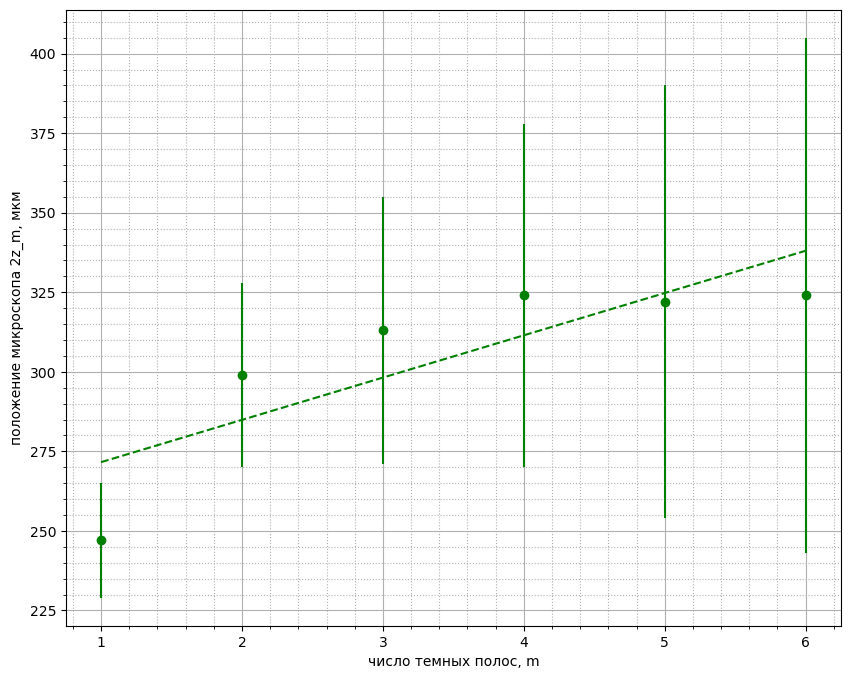

In [8]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

m = [1, 2, 3, 4, 5, 6]
x = [560, 570, 573, 574, 575, 577]

data = pd.DataFrame()
data['m'] = m
data['x'] = x

# data['delta_x'] = 0.009
# data['eps_x'] = data['delta_x'] / data['x']

a_m = [2.8, 2.05, 1.5, 1.2, 0.95, 0.8]
data["a_m"] = a_m
# data['a_m'] = 580 - data['x']
# data['s'] = data['a_m'] * data['m'] * 576.96/1000000
double_z_m = [247, 299, 313, 324, 322, 324]
data['2z_m'] = double_z_m
delta_2z_m = [18,29,42,54,68,81]
data['delta_2z_m'] = delta_2z_m

ax1 = prepare_plot("число темных полос, m", "положение микроскопа 2z_m, мкм")
drow_line(ax1, m, data['2z_m'], 0, data['delta_2z_m'], "green")
data


In [9]:
d_max = [6.4, 6]
slot_width = [7, 5.4]

data = pd.DataFrame()

data['ширина дифракционного максимума'] = d_max
data['slot_width'] = slot_width
data

,ширина дифракционного максимума,slot_width
0,6.4,7.0
1,6.0,5.4
